<a href="https://colab.research.google.com/github/majda-22/Self-Driving-CARLA-DRL/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon May 27 20:22:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 524, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'export', 'train', 'val', 'track', 'predict', 'benchmark'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'obb', 'detect', 'classify', 'segment', 'pose'}
                MODE (required) is one of {'export', 'train', 'val', 'track', 'predict', 'benchmark'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="PqaW7bzyyhdeZntUMVOJ")
project = rf.workspace("yolo-babua").project("traffic-light-detection-h8cvg")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.22, to fix: `pip install ultralytics==8.0.196`


In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml epochs=30 imgsz=640

Ultralytics YOLOv8.2.22 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Traffic-Light-Detection-2/valid/labels.cache... 931 images, 0 backgrounds, 0 corrupt: 100% 931/931 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 59/59 [00:28<00:00,  2.05it/s]
                   all        931       2379      0.934      0.941      0.973      0.673
                 green        931        953      0.918      0.958      0.979      0.682
                   off        931        114      0.928      0.904      0.948      0.623
                   red        931       1283       0.95       0.97      0.987      0.704
                yellow        931         29      0.941      0.931      0.977      0.684
Speed: 0.9ms preprocess, 20.3ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val
💡 Lear

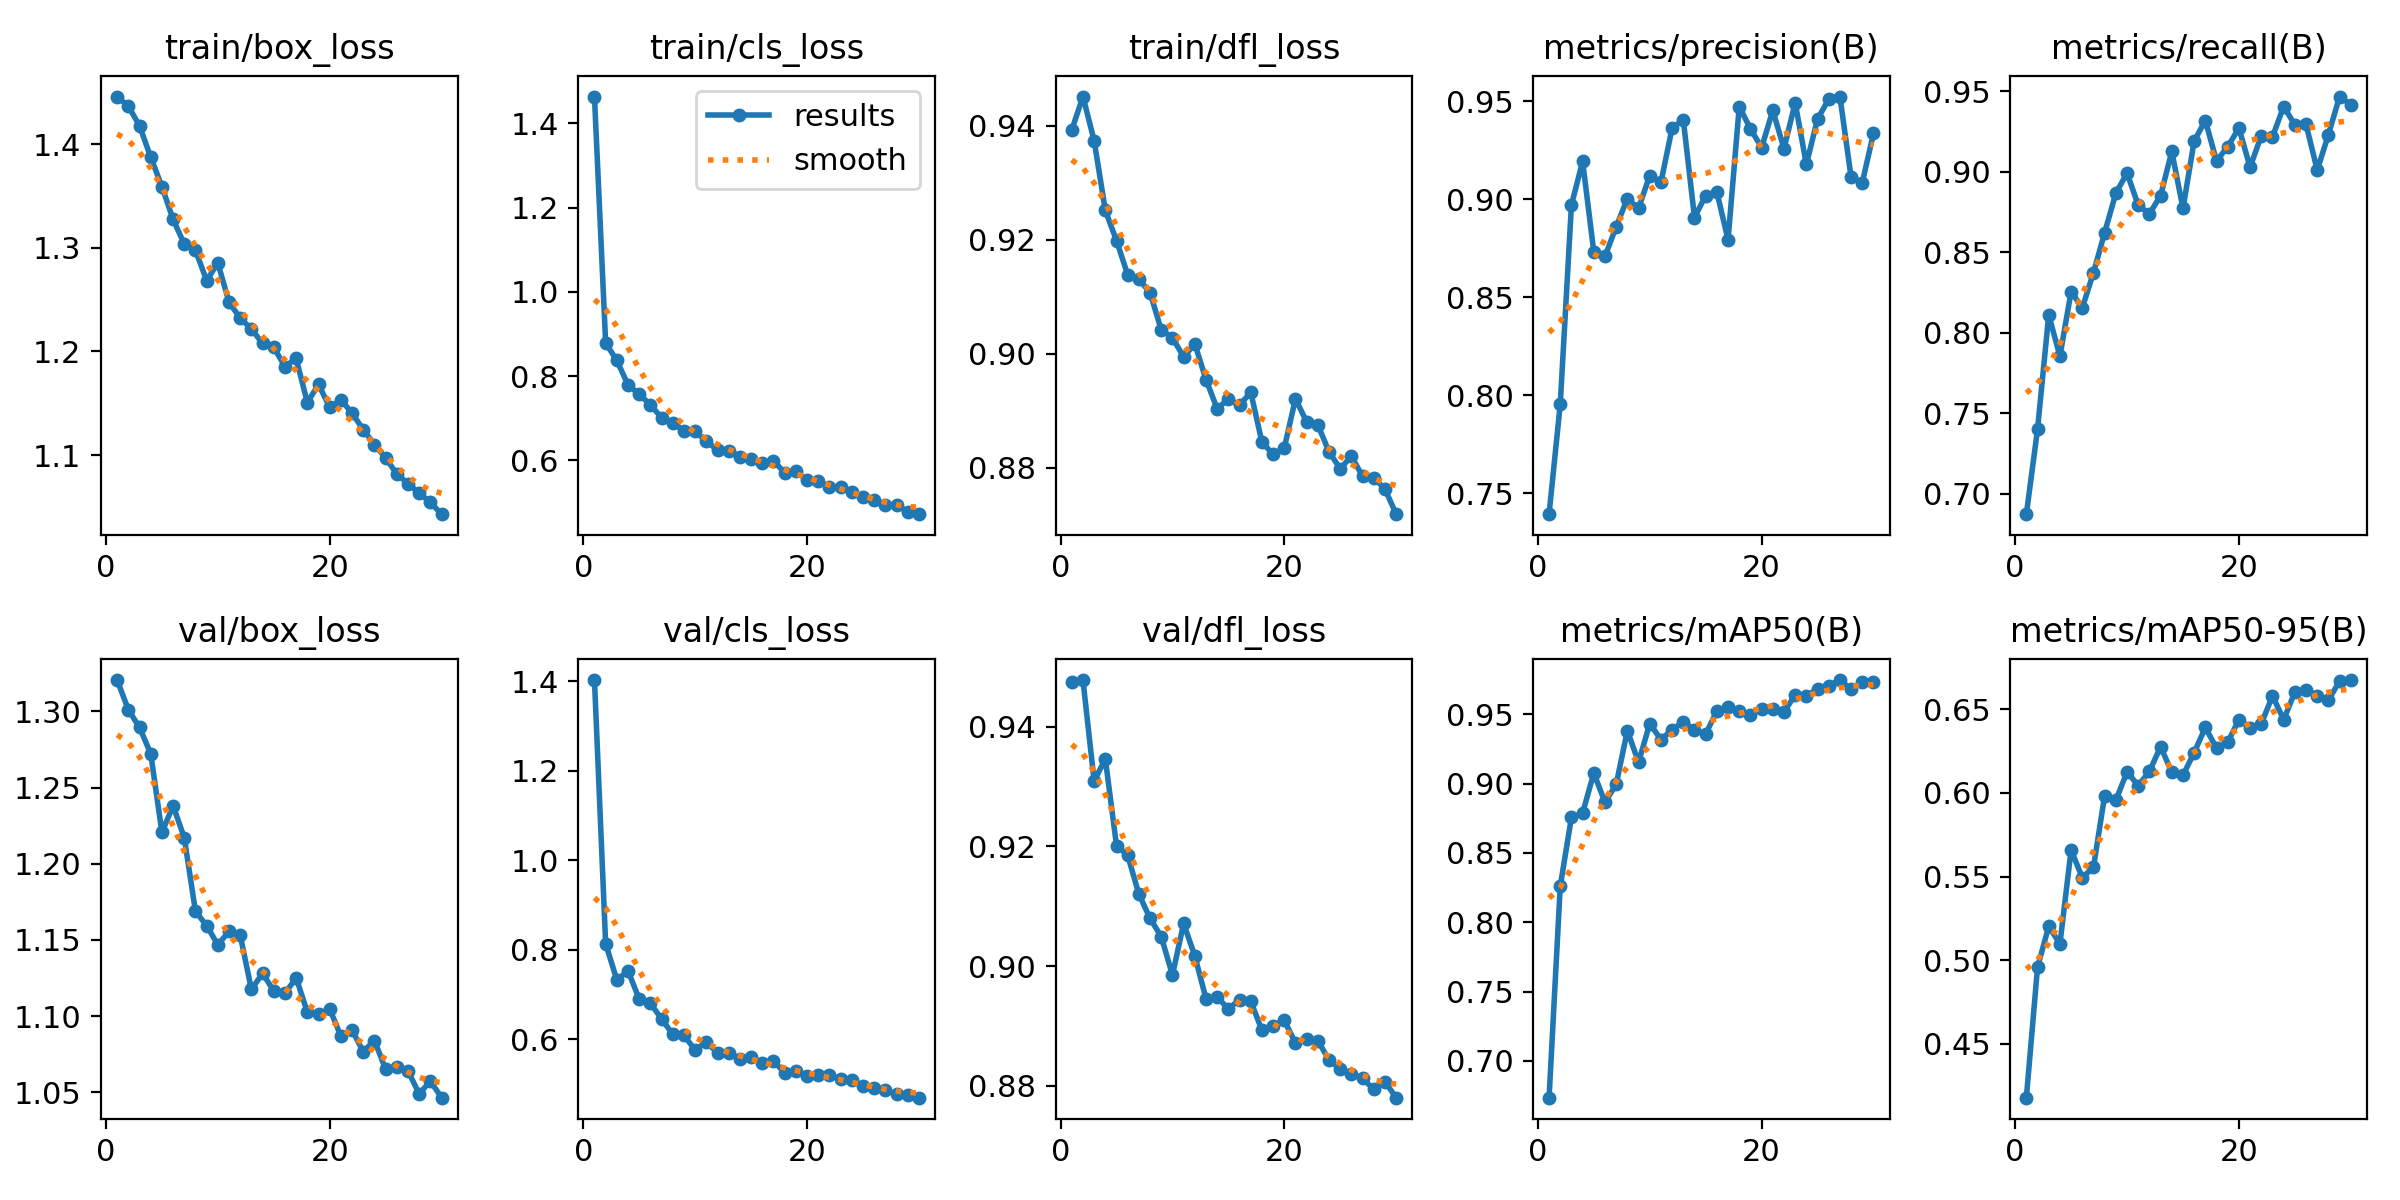

In [ ]:
Image(filename="/content/runs/detect/train2/results.png",width=600)

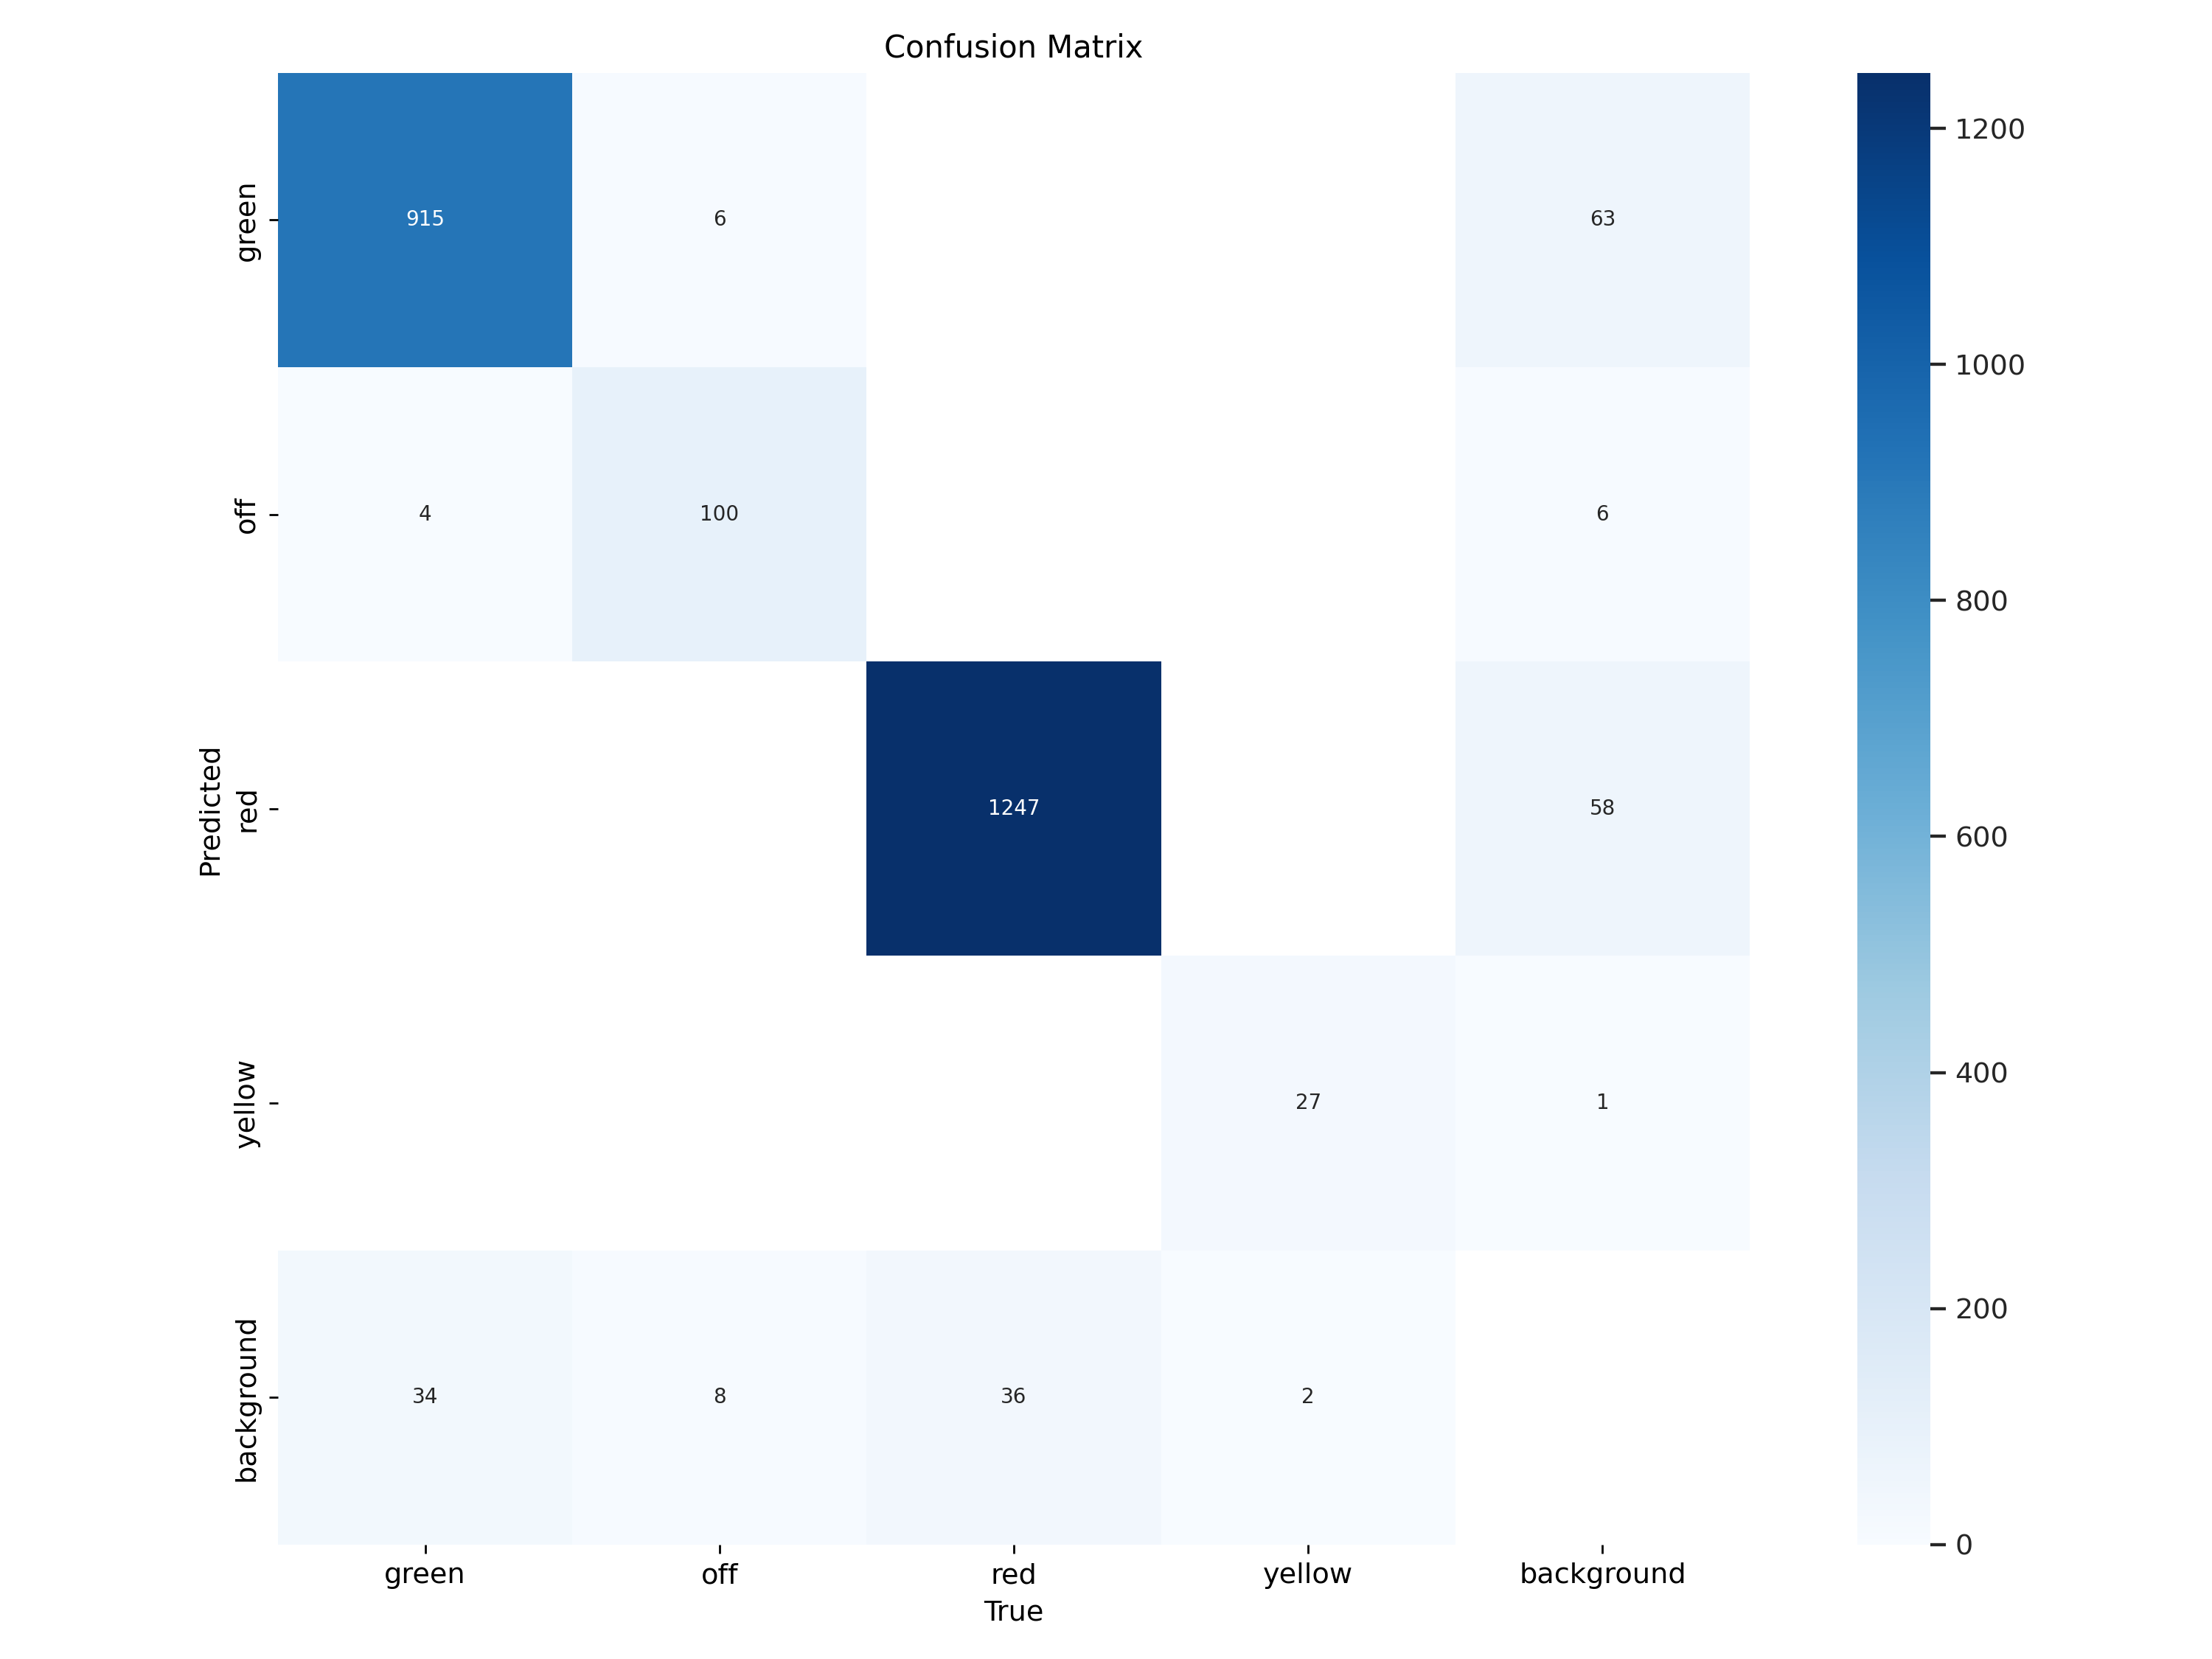

In [ ]:
Image(filename="/content/runs/detect/train2/confusion_matrix.png",width=600)